In [1]:
using Random, Distributions, Plots, Statistics  #GLMakie

In [2]:
dtx=open("lista7_zad1.txt")
dat0=readlines(dtx)
data=[]
for el in dat0
    push!(data,parse(Float64, el))
end;

# Błąd pierwszego rodzaju
Prawdopodobieństwo odrzucenia hipotezy zerowej, gdy ta jest prawdziwa. Jego teoretyczna wartość jest równa pozimowi istotności alpha

In [3]:
mu=1.5
sig=0.2
alpha=0.001
n=1000;

In [48]:
function Irodzaj(mu_alt,alpha=0.05,n=1000,N=1000,mu=1.5,sig=0.2,mode=0)
    ct=0
    for i in 1:N
        proba=rand(Normal(mu,sig),n)
        Z=(mean(proba)-mu)/(sig/sqrt(n))         #wartość statystyki tesowej Z
        
        if mode == 0                                       #obszar krytyczny mu_alt!=1.5
            ob_kryt = quantile.(Normal(), 1-alpha/2)
            if (Z <= -ob_kryt) || (Z>=ob_kryt)
                ct+=1
            end
        elseif mode == 1                                   #obszar krytyczny mu_alt>1.5
            ob_kryt = quantile.(Normal(), 1-alpha)
            if Z >= ob_kryt
                ct+=1
            end
        elseif mode == 2                                   #obszar krytyczny mu_alt<1.5
            ob_kryt = quantile.(Normal(), alpha)
            if Z <= ob_kryt
                ct+=1
            end
        end
        
    end
    return ct/N
end
        

Irodzaj (generic function with 7 methods)

In [49]:
Irodzaj(1.51,0.05,1000,1000,1.49,0.2,1)

0.047

# Błąd drugiego rodzaju
Błąd drugiego rodzaju to prawdopodobieństwo przyjęcia fałszywej hipotezy zerowej i odrzucenia prawdziwej hipotezy alternatywnej.

In [199]:
function IIrodzaj(mu_alt,alpha=0.05,n=1000,N=1000,mu=1.5,sig=0.2,mode=0)
    ct=0
    for i in 1:N
        proba=rand(Normal(mu_alt,sig),n)
        Z=(mean(proba)-mu)/(sig/sqrt(n))         #wartość statystyki tesowej Z
        
        if mode == 0                                       #obszar krytyczny mu_alt!=1.5
            ob_kryt = quantile.(Normal(), 1-alpha/2)
            if !((Z <= -ob_kryt) || (Z>=ob_kryt))
                ct+=1
            end
        elseif mode == 1                                   #obszar krytyczny mu_alt>1.5
            ob_kryt = quantile.(Normal(), 1-alpha)
            if !(Z >= ob_kryt)
                ct+=1
            end
        elseif mode == 2                                   #obszar krytyczny mu_alt<1.5
            ob_kryt = quantile.(Normal(), alpha)
            if !(Z <= ob_kryt)
                ct+=1
            end
        end
        
    end
    return ct/N
end

IIrodzaj (generic function with 7 methods)

# Weryfikacja hipotez

In [200]:
mu0=1.5 #H0
sig=0.2
alpha=0.05
n=length(data)

1000

-7.041450899607126
statystyka z jest w obszarze przyjęć- H1 jest fałszywa, , p-wartość 0.9999999999990488

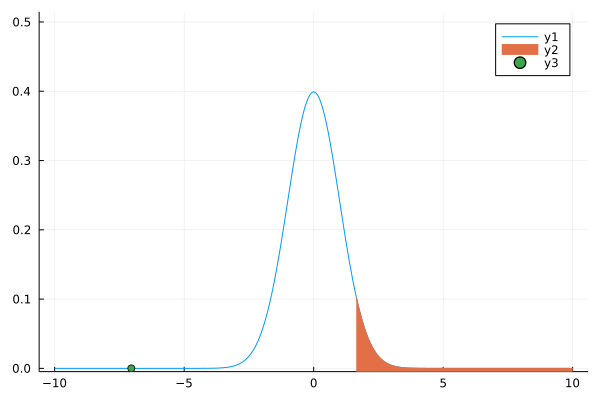

In [194]:
# H1 mu > 1.5 
L=Normal(0,1)

kwantyl1=quantile(L,1-alpha)

z = (mean(data)-mu0)/(sig/sqrt(n)) 
println(z)

p = 1-cdf(L,z)

if z>kwantyl1
    print("statystyka z jest w obszarze krytycznym - H1 prawdziwa, p-wartość $p")
else
    print("statystyka z jest w obszarze przyjęć- H1 jest fałszywa, , p-wartość $p")
end
#plot(x->pdf(L, x))
A=-10:0.002:10
ys = [pdf(L, x) for x in A]
A1 = kwantyl1:0.002:10
ys1 = [pdf(L, x) for x in A1]

plot(A,ys,ylim=[0.01,0.5])
plot!(A1,ys1, fillrange=-1)
#Plots.scatter!([kwantyl1],0:0.2:1)
Plots.scatter!([z],0:0.2:1)
#Plots.scatter!([kwantyl2],0:0.2:1)

-3.1490325743497163
statystyka z jest w obszarze krytycznym - H1 prawdziwa, , p-wartość 0.0008190596727673553

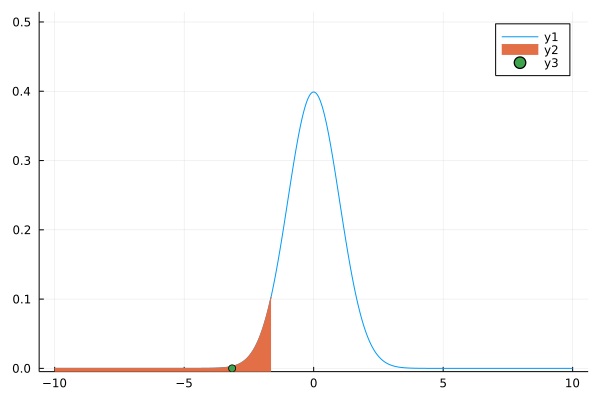

In [195]:
# H1 mu_alt<1.5
L=Normal(0,1)

kwantyl2=quantile(L,alpha)

z = (mean(data)-mu0)/(sqrt(sig)/sqrt(n))

println(z)

p = cdf(L,z)

if z<kwantyl2
    print("statystyka z jest w obszarze krytycznym - H1 prawdziwa, , p-wartość $p")
else
    print("statystyka z jest w obszarze przyjęć- H1 fałszywa, , p-wartość $p")
end

A=-10:0.002:10
ys = [pdf(L, x) for x in A]
A1 = -10:0.002:kwantyl2
ys1 = [pdf(L, x) for x in A1]

plot(A,ys,ylim=[0.01,0.5])
plot!(A1,ys1, fillrange=-1)
Plots.scatter!([z],0:0.2:1)

1.9599639845400576
-7.041450899607126
1.9024781749976682e-12
statystyka z jest w obszarze krytycznym - H1 prawdziwa, p-wartość 1.9024781749976682e-12

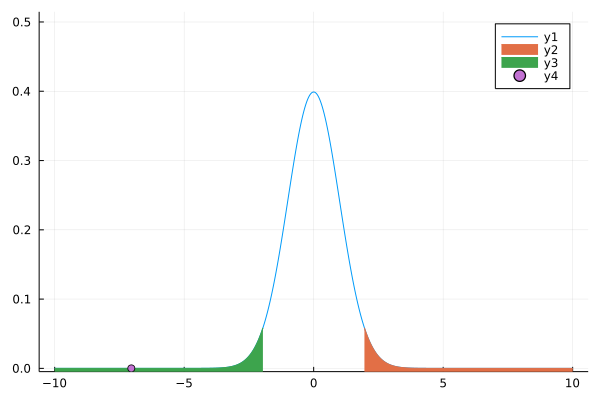

In [198]:
# H1 mu_alt!=1.5
L=Normal(0,1)

kwantyl3=quantile(L,1-alpha/2)
println(kwantyl3)
z= (mean(data)-mu0)/(sig/sqrt(n))
println(z)

p = 2-(2*cdf(L,abs(z)))
println(p)

if (z>kwantyl3) || (z<-kwantyl3)
    print("statystyka z jest w obszarze krytycznym - H1 prawdziwa, p-wartość $p")
else
    print("statystyka z jest w obszarze przyjęć- H1 fałszywa, p-wartość $p")
end

A=-10:0.002:10
ys = [pdf(L, x) for x in A]
A1 = kwantyl3:0.002:10
ys1 = [pdf(L, x) for x in A1]
A2 = -10:0.002:-kwantyl3
ys2 = [pdf(L, x) for x in A2]

plot(A,ys,ylim=[0.01,0.5])
plot!(A1,ys1, fillrange=-1)
plot!(A2,ys2, fillrange=-1)
Plots.scatter!([z],0:0.2:1)